In [41]:
import time
import json
import pandas as pd
import numpy as np
import re
from itertools import compress
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
def json_to_csv(directory, fileNames, createSample=False):
    """
    json_to_csv: loops through specified JSON files and converts them to csv files.
                 option to also create a sample csv, which uses np.random.seed 9001 to create a sample dataset with 10% of the observations
    
                 pandas has a read_json function, but returns a 'Trailing data error' when working with these specific files
                 
                 
    Inputs: -directory of JSON files
            -list of JSON filenames
            -createSample flag
            
    """
    
    start = time.time()

    jsonData = []

    for fileName in fileNames:
        with open(directory + fileName,  encoding="utf8") as file:
            print('{0} opened'.format(fileName))
            for line in file:
                #I use an rstrip here because some of the files have trailing blank spaces
                jsonData.append(json.loads(line.rstrip()))
        
        df = pd.DataFrame.from_dict(jsonData)
        
        csvFileName = fileName[:len(fileName)-5] + '.csv'
        
        df.to_csv(directory + csvFileName)
        print('{0} created'.format(csvFileName))
        
        
        if createSample:
            np.random.seed(9001)
            msk = np.random.rand(len(df)) <= 0.1
            sample = df[msk]
            
            csvSampleFileName = fileName[:len(fileName)-5] + '_sample.csv'
            
            sample.to_csv(directory + csvSampleFileName)
            print('{0} created'.format(csvSampleFileName))
        
    print('This function took {} minutes to run'.format((time.time()-start)/60))
    

In [43]:
# fileNameList = ['user.json',
#                 'business.json', 
#                 'review.json']

# json_to_csv('data/', fileNameList, createSample=True)

In [44]:
df_business = pd.read_json('data/business.json',lines=True)

df_business.dropna(inplace=True, subset = ['categories'], axis=0)

df_business.loc[df_business['categories'].str.contains('Restaurants')]

df_business['categories'].value_counts()

Restaurants, Pizza                                                                                                                                1042
Nail Salons, Beauty & Spas                                                                                                                        1031
Pizza, Restaurants                                                                                                                                 993
Beauty & Spas, Nail Salons                                                                                                                         947
Food, Coffee & Tea                                                                                                                                 888
Mexican, Restaurants                                                                                                                               885
Coffee & Tea, Food                                                                            

In [9]:
#df_user = pd.read_csv('data/user.csv', nrows = 100)

In [10]:
import os

In [11]:
os.listdir('data/')

['.DS_Store',
 'business.json',
 'review_sample.csv',
 'business.csv',
 'user.json',
 'review.csv',
 'user.csv',
 'business_sample.csv',
 'user_sample.csv',
 'review.json',
 'restaurants.csv']

In [28]:
df_review =  pd.read_csv('data/review.csv', usecols = ['business_id', 'user_id', 'stars'])



In [33]:
user_cnts = df_review['user_id'].value_counts()
top_users = user_cnts.loc[user_cnts>2].index
df_review = df_review.loc[df_review['user_id'].isin(top_users)]
df_review.to_csv('data/filtered_reviews.csv')

In [39]:
df_review = pd.read_csv('data/filtered_reviews.csv', index_col=0)

/Users/thomaslee/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [40]:
df_review

,business_id,stars,user_id
0,ujmEBvifdJM6h6RLv4wQIg,1.0,hG7b0MtEbXx5QzbzE6C_VA
2,WTqjgwHlXbSFevF32_DJVw,5.0,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,dacAIZ6fTM6mqwW5uxkskg
6,3fw2X5bZYeW9xCz_zGhOHg,3.0,jlu4CztcSxrKx56ba1a5AQ
7,zvO-PJCpNk4fgAVUnExYAA,1.0,d6xvYpyzcfbF_AZ8vMB7QA
8,b2jN2mm9Wf3RcrZCgfo1cg,2.0,sG_h0dIzTKWa3Q6fmb4u-g
9,oxwGyA17NL6c5t1Etg5WgQ,3.0,nMeCE5-xsdleyxYuNZ_7rA
10,8mIrX_LrOnAqWsB5JrOojQ,4.0,FIk4lQQu1eTe2EpzQ4xhBA
12,FxLfqxdYPA6Z85PFKaqLrg,4.0,GYNnVehQeXjty0xH7-6Fhw
14,AakkkTuGZA2KBodKi2_u8A,1.0,TpyOT5E16YASd7EWjLQlrw


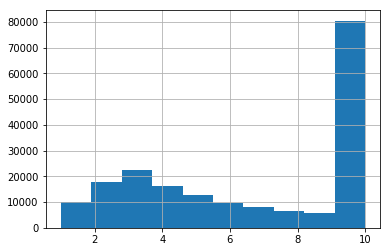

In [34]:
df_review['business_id'].value_counts().clip(lower=0,upper=10).hist()

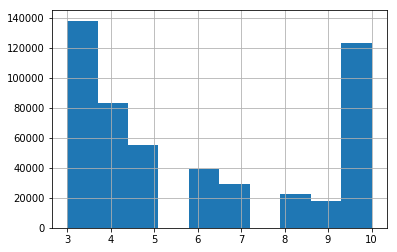

In [35]:
df_review['user_id'].value_counts().clip(lower=0,upper=10).hist()

In [45]:
df_review.head()

,business_id,stars,user_id
0,ujmEBvifdJM6h6RLv4wQIg,1.0,hG7b0MtEbXx5QzbzE6C_VA
2,WTqjgwHlXbSFevF32_DJVw,5.0,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,dacAIZ6fTM6mqwW5uxkskg
6,3fw2X5bZYeW9xCz_zGhOHg,3.0,jlu4CztcSxrKx56ba1a5AQ
7,zvO-PJCpNk4fgAVUnExYAA,1.0,d6xvYpyzcfbF_AZ8vMB7QA


In [ ]:
def matrix_factorization(df_review, business_id, stars, user_id, num-recommendation=3):
    
    
    
     
    
